# Basic Concepts

This tutorial is an introduction to medicinal chemistry molecular filtering. It will show that applying thoes type of filters and rules systematically and blindly is often not a good idea. While powerful such filtering technics must always be carefully assesed and prototyped before using systematically and at large scale.

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import datamol as dm
import pandas as pd

import medchem as mc

In [6]:
smiles_list = [
    "NC1=C2C(N(CC(OCP(O)(O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OCOC(OC(C)C)=O)(OCOC(OC(C)C)=O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OC3=CC=CC=C3)(NC(C)C(OC(C)C)=O)=O)C)C=N2)=NC=N1",
]

data = pd.DataFrame({"smiles": smiles_list})
data["mol"] = data["smiles"].apply(dm.to_mol)

data

,smiles,mol
0,NC1=C2C(N(CC(OCP(O)(O)=O)C)C=N2)=NC=N1,<rdkit.Chem.rdchem.Mol object at 0x7f893941f450>
1,NC1=C2C(N(CC(OCP(OCOC(OC(C)C)=O)(OCOC(OC(C)C)=...,<rdkit.Chem.rdchem.Mol object at 0x7f893941f840>
2,NC1=C2C(N(CC(OCP(OC3=CC=CC=C3)(NC(C)C(OC(C)C)=...,<rdkit.Chem.rdchem.Mol object at 0x7f893941f990>


Let's first compute some filters, rules and alerts on the dataset.

In [8]:
data["rule_of_five"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_five)
data["rule_of_ghose"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_ghose)
data["rule_of_veber"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_veber)
data["rule_of_zinc"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_zinc)

Now let's display those molecules and whether they pass the rules above.

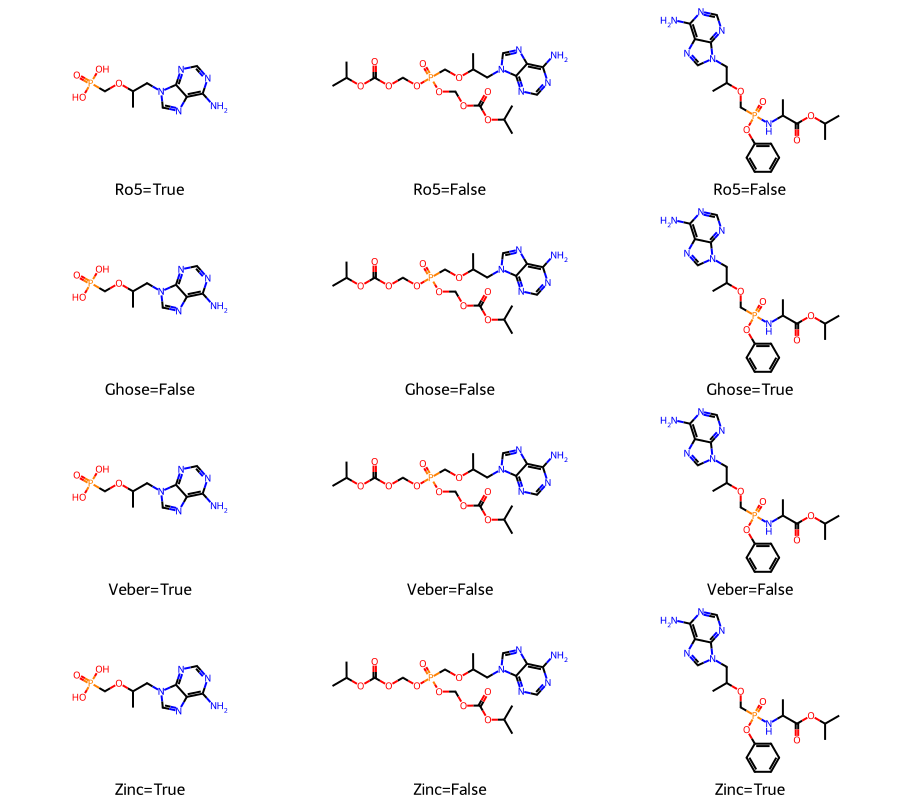

In [29]:
legends = []
legends += [f"Ro5={v}" for v in data["rule_of_five"]]
legends += [f"Ghose={v}" for v in data["rule_of_ghose"]]
legends += [f"Veber={v}" for v in data["rule_of_veber"]]
legends += [f"Zinc={v}" for v in data["rule_of_zinc"]]

mol_list = data["mol"].tolist() * 4

dm.to_image(mol_list, legends=legends, n_cols=3, mol_size=(300, 200))
